In [1]:
# tutorial: https://towardsdatascience.com/real-time-face-recognition-an-end-to-end-project-b738bb0f7348

In [4]:
# imports

import os
from os import path
import time
from datetime import datetime
# use this Python library to load your variables
from dotenv import load_dotenv
load_dotenv()
print("Env vars loaded.")

import shutil

import numpy as np

Env vars loaded.


In [5]:
import cv2 as cv2
print("cv2 version:", cv2.__version__)

from PIL import Image
from matplotlib import pyplot as plt

cv2 version: 4.6.0


In [3]:
def test_camera():
    cap = cv2.VideoCapture(0)
    cap.set(3,640) # set Width
    cap.set(4,480) # set Height
    while(True):
        ret, frame = cap.read()
        #frame = cv2.flip(frame, -1) # Flip camera vertically
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame', frame)
        cv2.imshow('gray', gray)

        k = cv2.waitKey(30) & 0xff
        if k == 27: # press 'ESC' to quit
            break
    cap.release()
    cv2.destroyAllWindows()
    
test_camera()

In [4]:
def capture_vid():
    # https://github.com/Mjrovai/OpenCV-Face-Recognition/blob/master/FaceDetection/faceDetection.py
    '''
    Haar Cascade Face detection with OpenCV  
        Based on tutorial by pythonprogramming.net
        Visit original post: https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/  
    Adapted by Marcelo Rovai - MJRoBot.org @ 7Feb2018 
    '''

    # multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades
    faceCascade = cv2.CascadeClassifier(path.join('cv2_Cascades', 'haarcascade_frontalface_default.xml'))

    cap = cv2.VideoCapture(0)
    cap.set(3,640) # set Width
    cap.set(4,480) # set Height

    while True:
        ret, img = cap.read()
        #img = cv2.flip(img, -1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # faceCascade.detectMultiScale: detects faces in img.
        # Params:
        # @scaleFactor: from "https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/": ScaleFactor determines the factor of increase in window size which initially starts at size “minSize”, and after testing all windows of that size, the window is scaled up by the “scaleFactor”, and the window size goes up to “maxSize”. If the “scaleFactor” is large, (e.g., 2.0), there will be fewer steps, so detection will be faster, but we may miss objects whose size is between two tested scales. (default scale factor is 1.3)
        # @minNeighbors: from "https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/": Higher the values of the “minNeighbors”, less will be the number of false positives, and less error will be in terms of false detection of faces. However, there is a chance of missing some unclear face traces as well.
        # @minSize: min Dims of a rectangle to be considered as a face if classified so
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.2,
            minNeighbors=5, # specifies how many neighbors each candidate rectangle should have, to retain it. A higher number gives lower false positives.
            minSize=(20, 20)
        )

        # draw rectangles on image components when containing face(s): 
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            # keep updating the real-time capture
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]


        cv2.imshow('video',img)

        k = cv2.waitKey(30) & 0xff
        if k == 27: # press 'ESC' to quit
            break

    cap.release()
    cv2.destroyAllWindows()
    
capture_vid()

In [5]:
# Create gray-scale user photos dataset
def create_gs_user_photos_ds(user_id):
    
    gs_ds_dir = path.join("imgs", "user_photos", "gs")
    
    # remove previous ds if exists and create a new empty one.
    try:
        shutil.rmtree(gs_ds_dir)
    except:
        pass
    os.mkdir(gs_ds_dir)
    
    try:
    
        cam = cv2.VideoCapture(0)
        cam.set(3, 640) # set video width
        cam.set(4, 480) # set video height
        face_detector = cv2.CascadeClassifier(path.join('cv2_Cascades', 'haarcascade_frontalface_default.xml'))

        print("[INFO] Initializing face capture. Look the camera and wait. Press 's' to save a frame and 'ESC' to stop...")
        # Initialize individual sampling face count
        count = 0
        while(True):
            ret, img = cam.read()
            #img = cv2.flip(img, -1) # flip video image vertically
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_detector.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
                cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
                
            cv2.imshow('image', img)

            k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video 
            if k == ord('s'): # press "s" to save face from current frame
                count += 1
                # Save the captured image into the datasets folder
                cv2.imwrite(path.join(gs_ds_dir, "User.{0}.{1}.jpg".format(user_id, count)), gray[y:y+h,x:x+w])
                
            elif k == 27: # if ESC is pressed
                break
            elif count >= 30: # Take 30 face sample and stop video
                 break
    except Exception as ex:
        print("[Error]:", ex)
        
    finally:
        # Do a bit of cleanup
        print("\n [INFO] Exiting Program and cleanup stuff")
        cam.release()
        cv2.destroyAllWindows()
    
    return None

create_gs_user_photos_ds(user_id = 1)

[INFO] Initializing face capture. Look the camera and wait ...

 [INFO] Exiting Program and cleanup stuff


In [ ]:
# # create gray scale photos from already existing photos (without real time cammera)
# def create_gray_user_photos_ds():
    
#     photos_dir = path.join("imgs", "user_photos")
#     gray_photos_dir = path.join(photos_dir, "nrt-gs") #non-real time gray-scale
    
#     # remove previous conversion output and create a new empty one.
#     try:
#         shutil.rmtree(gray_photos_dir)
#     except:
#         pass
#     os.mkdir(gray_photos_dir)
    
#     filenames = os.listdir(photos_dir)
#     i = 0
#     for filename in filenames:
        
#         # take file with "jpg", "jpeg", "png" extension only
#         if filename.split(".")[-1].lower() not in ["jpg", "jpeg", "png"]:
#             continue
        
#         filepath = path.join(photos_dir, filenames)
        
#         img = cv2.imread(filepath, 0)
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         cv2.imwrite(filepath, gray)
        
#         i += 1
        
#     print("Converted {0} user photos to gray scale".format(i))
    
# create_gray_user_photos_ds()

In [14]:
def face_rec_train(face_gs_imgs_dir):
    
    # Path for face image database
    path = face_gs_imgs_dir
    # use LOCAL BINARY PATTERNS HISTOGRAMS for face recognition by creating a representation of the texture pattern in the neighberhood 
    # to read more: https://www.geeksforgeeks.org/face-recognition-with-local-binary-patterns-lbps-and-opencv/
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    detector = cv2.CascadeClassifier(os.path.join("cv2_Cascades", "haarcascade_frontalface_default.xml"))
    # function to get the images and label data
    def getImagesAndLabels(path):
        imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
        faceSamples=[]
        ids = []
        for imagePath in imagePaths:
            PIL_img = Image.open(imagePath).convert('L') # grayscale
            img_numpy = np.array(PIL_img,'uint8')
            id = int(os.path.split(imagePath)[-1].split(".")[1]) # filename has patter: User.[user_id].[photo_num].jpg
            faces = detector.detectMultiScale(img_numpy)
            for (x,y,w,h) in faces:
                faceSamples.append(img_numpy[y:y+h,x:x+w])
                ids.append(id)
        return faceSamples,ids
    print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
    faces,ids = getImagesAndLabels(path)
    recognizer.train(faces, np.array(ids))
    # Save the model into trainer/trainer.yml
    recognizer.write(os.path.join('face_trainer', 'trainer.yml'))
    # Print the numer of faces trained and end program
    print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))
    
    return None


usr_photos_gs_ds_dir = path.join("imgs", "user_photos", "gs")
face_rec_train(usr_photos_gs_ds_dir)


 [INFO] Training faces. It will take a few seconds. Wait ...

 [INFO] 1 faces trained. Exiting Program


# real-time recognizer

In [24]:
def validate_face_realtime():

    user_validated = False

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(path.join('face_trainer', 'trainer.yml'))
    faceCascade = cv2.CascadeClassifier(path.join("cv2_Cascades", "haarcascade_frontalface_default.xml"));
    font = cv2.FONT_HERSHEY_SIMPLEX
    #iniciate id counter
    id = 0
    # names related to ids: example ==> Omar: id=1,  etc
    names = ['User_0', 'Omar', 'User_1']

    try:
        # Initialize and start realtime video capture
        cam = cv2.VideoCapture(0)
        cam.set(3, 640) # set video widht
        cam.set(4, 480) # set video height
        # Define min window size to be recognized as a face
        minW = 0.1*cam.get(3)
        minH = 0.1*cam.get(4)
        while True:
            ret, img =cam.read()
            #img = cv2.flip(img, -1) # Flip vertically
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            faces = faceCascade.detectMultiScale( 
                gray,
                scaleFactor = 1.2,
                minNeighbors = 5,
                minSize = (int(minW), int(minH)),
               )
            for(x,y,w,h) in faces:
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
                id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

                # If confidence is less them 100 ==> "0" : perfect match 
                if (confidence < 100):
                    id = names[id]
                    confidence = "  {0}%".format(round(100 - confidence))
                    
                    if not user_validated: # print only once
                        print("Good Job! Face validated!")
                        print("[Info] Press Esc to end.")
                        user_validated = True
                    
                else:
                    id = "unknown"
                    confidence = "  {0}%".format(round(100 - confidence))

                cv2.putText(
                            img, 
                            str(id), 
                            (x+5,y-5), 
                            font, 
                            1, 
                            (255,255,255), 
                            2
                           )
                cv2.putText(
                            img, 
                            str(confidence), 
                            (x+5,y+h-5), 
                            font, 
                            1, 
                            (255,255,0), 
                            1
                           )  

            cv2.imshow('camera',img) 
            k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
            if k == 27:
                break
    except Exception as ex:
        print("[Error]:", ex)
    finally:
        # Do a bit of cleanup
        print("\n [INFO] Exiting Program and cleanup stuff")
        cam.release()
        cv2.destroyAllWindows()
        
        return user_validated
    
validate_face_realtime()

Good Job! Face validated!
[Info] Press Esc to end.

 [INFO] Exiting Program and cleanup stuff


True

> Image: imgs/captured/1719395070404.jpg
	- Good Job! Omar's face validated!


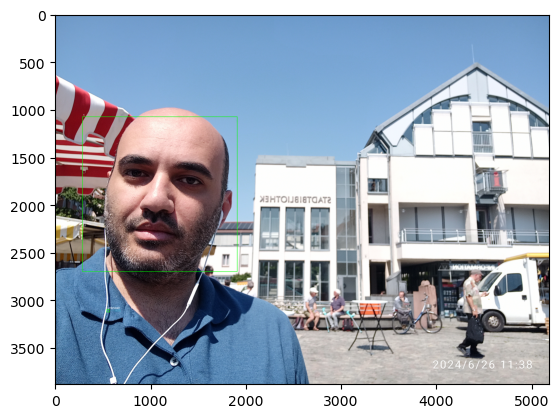

> Image: imgs/captured/1719395070417.jpg
	- Good Job! Omar's face validated!


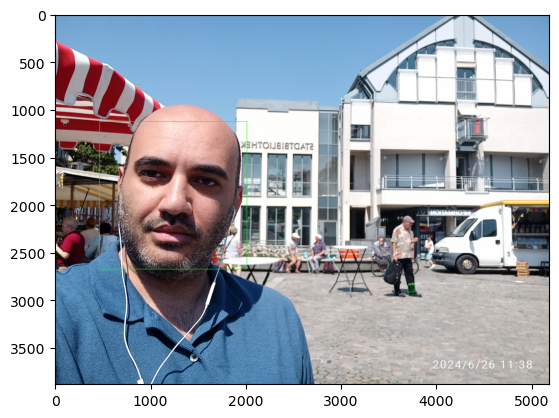

> Image: imgs/captured/1719395070429.jpg
	- Good Job! Omar's face validated!


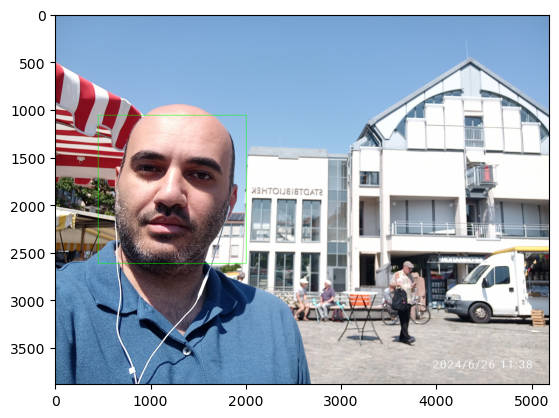

> Image: imgs/captured/1719395070390.jpg
	- Can't find Omar in the image


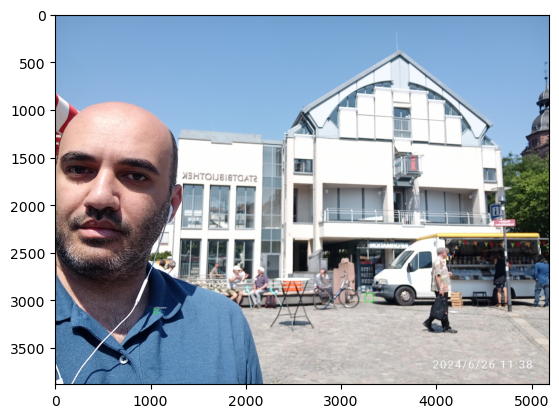

In [18]:
def validate_face_in_img(img_path, val_usr_name):
    
    print("> Image:", img_path)

    user_validated = False

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(path.join('face_trainer', 'trainer.yml'))
    faceCascade = cv2.CascadeClassifier(path.join("cv2_Cascades", "haarcascade_frontalface_default.xml"));
    font = cv2.FONT_HERSHEY_SIMPLEX
    #iniciate id counter
    id = 0
    # names related to ids: example ==> Omar: id=1,  etc
    names = ['User_0', 'Omar']
    
    # read img from path and convert it into Numpy array in gray scale
    img = cv2.imread(img_path)
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (15, 15),
       )
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 4)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # If confidence is less them 100 ==> "0" : perfect match 
        if (confidence < 100):
            user_name = names[id]
            if user_name == val_usr_name:
                confidence = "  {0}%".format(round(100 - confidence))
                user_validated = True
            else:
                id = "unknown"
                confidence = "  {0}%".format(round(100 - confidence))

        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))

        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
        
    if user_validated:
        print("\t- Good Job! {0}'s face validated!".format(val_usr_name))
    else:
        print("\t- Can't find {0} in the image".format(val_usr_name))
        
        
    # change BGR to RGB
    img = img[...,::-1]
    # show validation rectangle and label
    plt.imshow(img)
    plt.show()

    return user_validated


val_usr_name = "Omar"
captured_imgs_dir = path.join("imgs", "captured")
captured_img_filenames = os.listdir(captured_imgs_dir)
for img_filename in captured_img_filenames:
    img_path = path.join(captured_imgs_dir, img_filename)
    user_validated = validate_face_in_img(img_path, val_usr_name)